### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import warnings


In [45]:
warnings.filterwarnings("ignore") #ignoring some unwanted warnings

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [46]:
data = pd.read_csv('data/coupons.csv')

In [47]:
data.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [48]:
data['coupon'].value_counts()  #exploring unique values in coupon column

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [49]:
data.count() #Count values in each column to see if there is any with very few which can be ignored

destination             12684
passanger               12684
weather                 12684
temperature             12684
time                    12684
coupon                  12684
expiration              12684
gender                  12684
age                     12684
maritalStatus           12684
has_children            12684
education               12684
occupation              12684
income                  12684
car                       108
Bar                     12577
CoffeeHouse             12467
CarryAway               12533
RestaurantLessThan20    12554
Restaurant20To50        12495
toCoupon_GEQ5min        12684
toCoupon_GEQ15min       12684
toCoupon_GEQ25min       12684
direction_same          12684
direction_opp           12684
Y                       12684
dtype: int64

In [50]:
print("Duplicate rows:",data.duplicated().sum()) #check for duplicate rows
print("Null Rows :", data.isnull().all(axis=1).sum()) #check for rows with all null values
print("Total Rows:",data.shape[0])


Duplicate rows: 74
Null Rows : 0
Total Rows: 12684


3. Decide what to do about your missing data -- drop, replace, other...

In [51]:
#the car column has very few values which would not contribute much so dropping it
data = data.drop('car', axis=1) 
#renaming column Y and converting values  to make more readable
data.rename(columns={'Y': 'CouponAcceptance'}, inplace=True)
data['CouponAcceptance'] = data['CouponAcceptance'].astype(str)
data['CouponAcceptance'] = data['CouponAcceptance'].replace([re.escape(r'1'),re.escape(r'0')],['Accepted','NotAccepted'],regex=True) 

#keeping only 1 record out of the duplicate rows
data = data.drop_duplicates(keep='first')


4. What proportion of the total observations chose to accept the coupon?



CouponAcceptance
Accepted       0.567565
NotAccepted    0.432435
Name: proportion, dtype: float64


Text(0, 0.5, 'Coupons')

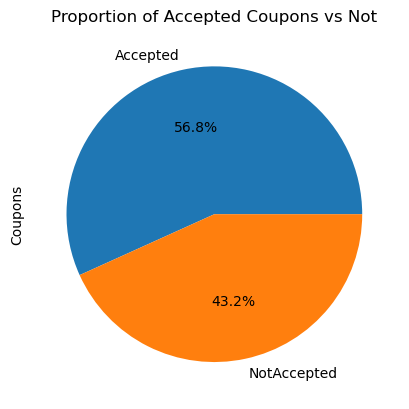

In [52]:

totalObs = data['CouponAcceptance'].value_counts(normalize=True)
print(totalObs)
#may be show a pie chart too
totalObs.plot.pie(autopct='%1.1f%%') 
plt.title("Proportion of Accepted Coupons vs Not")
plt.ylabel("Coupons")


5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Distribution of Coupon Column')

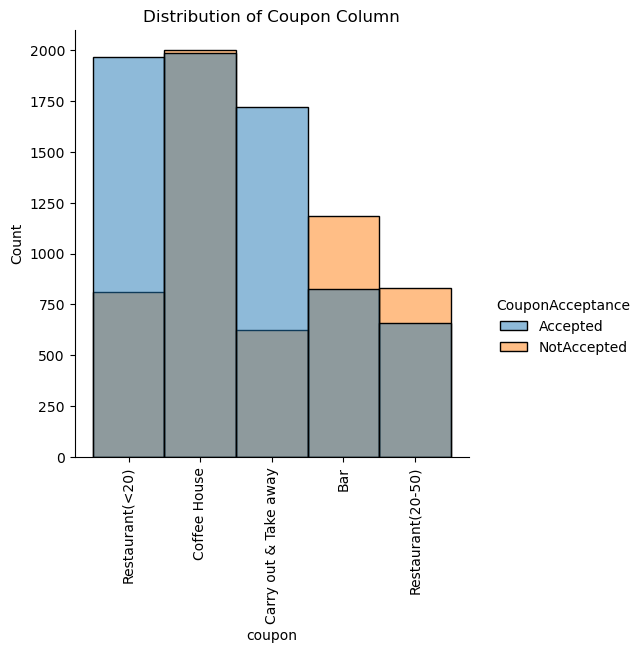

In [53]:
sns.displot(data,x='coupon',hue='CouponAcceptance')
plt.xticks(rotation=90)
plt.title('Distribution of Coupon Column')

6. Use a histogram to visualize the temperature column.

Text(0.5, 0, 'Temperature in Celsius')

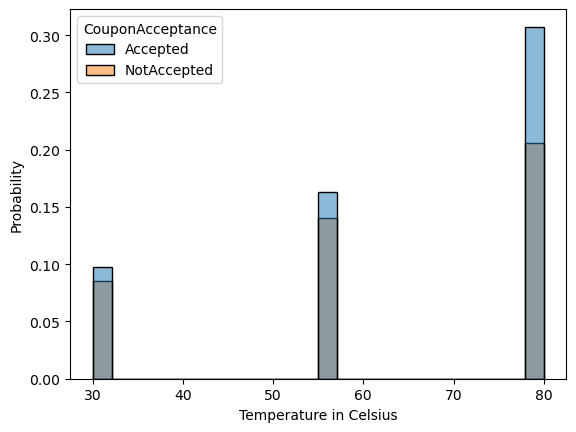

In [54]:
sns.histplot(data=data, x='temperature', hue='CouponAcceptance',stat='probability',common_norm=True)
#data['temperature'].plot.hist(hue='temperature')
plt.xlabel('Temperature in Celsius')

Observation: The Coupon Acceptance rate gets better with more warmer and more favourable temperature.

Visualizing Time column with Accepted or not Accepted coupons

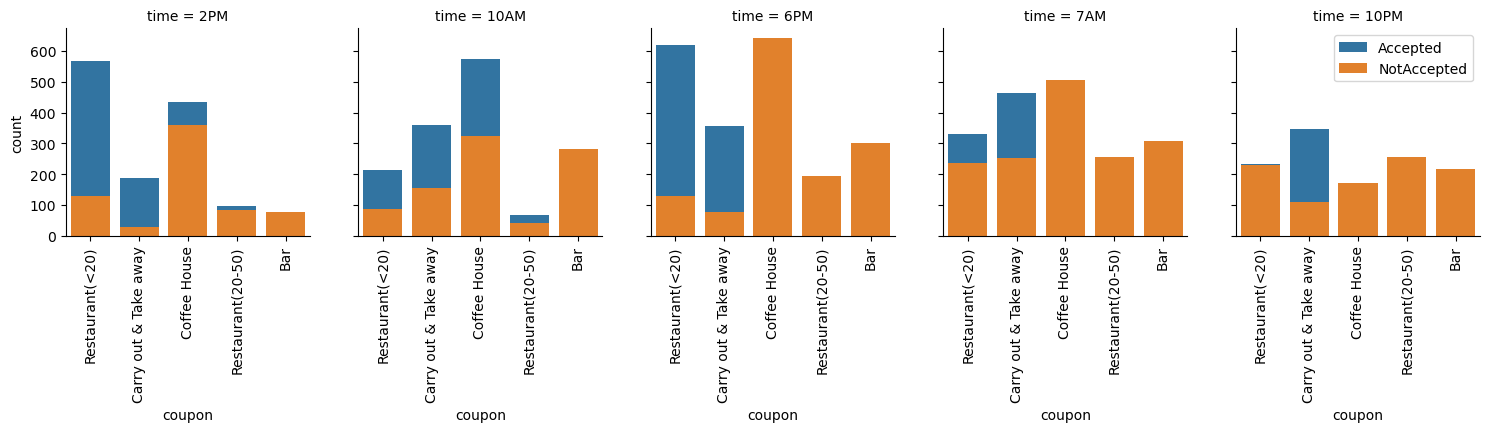

In [55]:
# Create a FacetGrid
g = sns.FacetGrid(data, col='time', hue='CouponAcceptance')

# Map the countplot to each facet
g.map(sns.countplot, 'coupon')
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend()
# Show the plot
plt.show()

Observation: The Coupon Acceptance rate gets better when coupon are presented relevent to the time of the day for ex, Coffee in the morning, restaurant and take outs during lunch or dinner

Visualizing expiration column with accepted or not accepted coupons

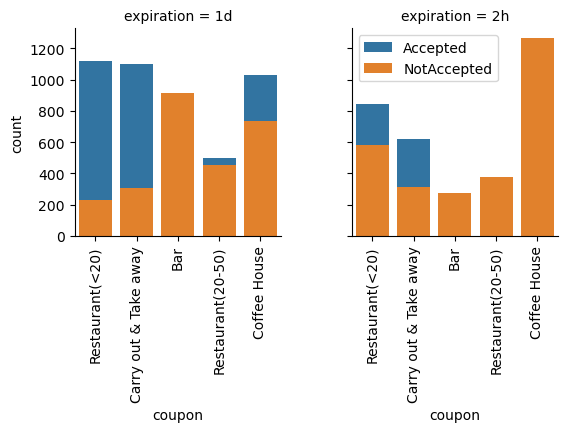

In [56]:
# Create a FacetGrid
g = sns.FacetGrid(data, col="expiration", hue='CouponAcceptance')

# Map the countplot to each facet
g.map(sns.countplot, "coupon")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend()
# Show the plot
plt.show()

Observation: The Coupon Acceptance rate is better for coupons with greater validity and not expiring soon

Visualizing weather column with accepted or not accepted coupons

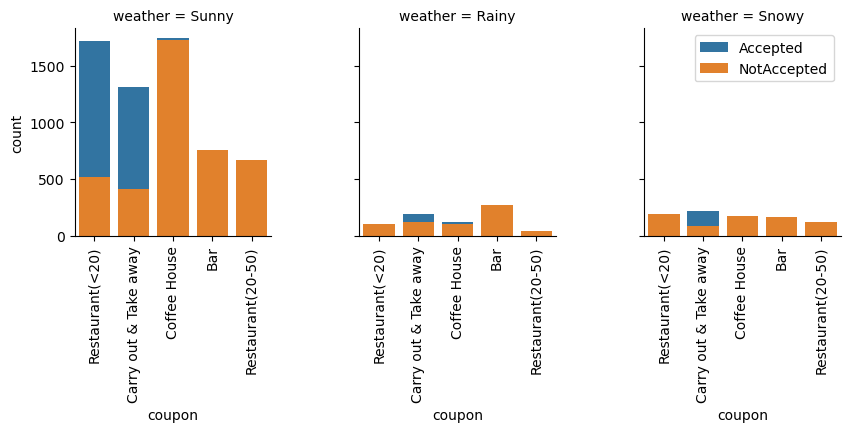

In [57]:
# Create a FacetGrid
g = sns.FacetGrid(data, col="weather", hue='CouponAcceptance')

# Map the countplot to each facet
g.map(sns.countplot, "coupon")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend()
# Show the plot
plt.show()


Observation: The Coupon Acceptance rate is better when the weather is Sunny

Visualization Destination label with respect Accepted/NotAccepted coupons

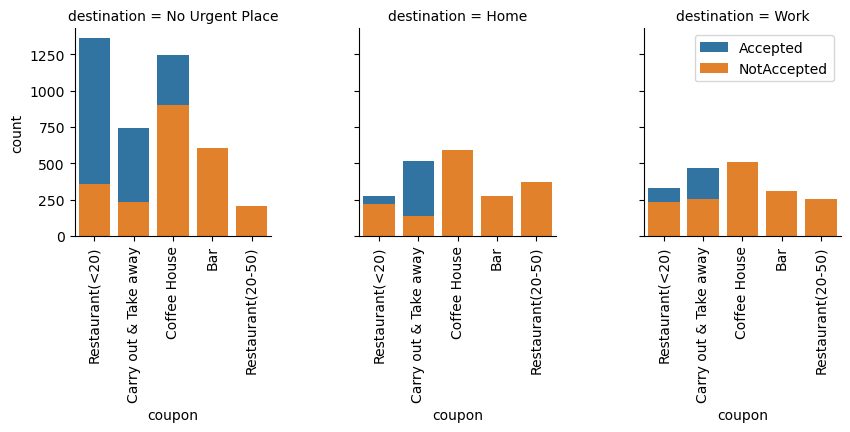

In [58]:
# Create a FacetGrid
g = sns.FacetGrid(data, col="destination", hue='CouponAcceptance')

# Map the countplot to each facet
g.map(sns.countplot, "coupon")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend()
# Show the plot
plt.show()


Observation: The Coupon Acceptance rate is better when the drivers are not going to a specific destination

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [59]:
BarCouponData = data[data['coupon'] == 'Bar'] #create a subset of data for only Bar coupons
print(type(BarCouponData))

<class 'pandas.core.frame.DataFrame'>


2. What proportion of bar coupons were accepted?


<Axes: ylabel='count'>

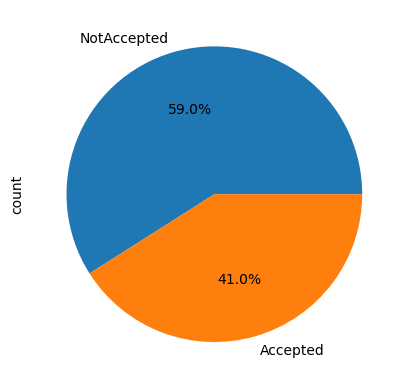

In [ ]:
BarCouponData['CouponAcceptance'].value_counts().plot.pie(autopct='%1.1f%%') 


Observation: Overall 59% of drivers Accepted coupons vs 41% who did not

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [117]:
ct = pd.crosstab(BarCouponData.query('CouponAcceptance == "Accepted"')['CouponAcceptance'],
                 BarCouponData['Bar'].str.contains('1-3|never|less1'),normalize='index')
ct.columns = ['3orFewer', 'MoreThan3']
ct_Transposed = ct.T
print(ct_Transposed)

CouponAcceptance  Accepted
3orFewer          0.502451
MoreThan3         0.497549


Pie Chart of acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

<Axes: ylabel='Accepted'>

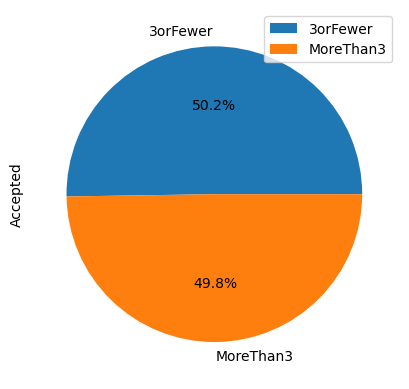

In [119]:
ct_Transposed.plot.pie(y='Accepted',autopct='%1.1f%%')


Observation: Acceptance of drivers who went to Bar 3 or less times in a month is slightly higher then other

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Text(0.5, 1.0, 'Bar Coupon Distribution')

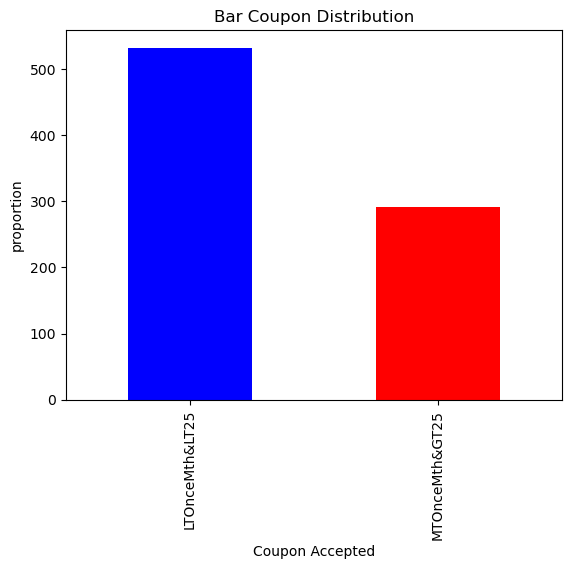

In [63]:
tmp = BarCouponData.query('CouponAcceptance == "Accepted"').groupby((BarCouponData['Bar'].str.contains('never|less1')== False)
                                                     &(BarCouponData['age'].str.contains('26|31|50plus|36|41|46')))[['CouponAcceptance']].value_counts()
tmp.plot.bar(color=['blue','red']) 
plt.xlabel('Coupon Accepted')
plt.xticks([0, 1], [ 'LTOnceMth&LT25', 'MTOnceMth&GT25'])
plt.ylabel('proportion')
plt.title('Bar Coupon Distribution')


Observation: Acceptance of drivers who went to Bar 3 or less times and are less then 25 years old higher then other

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Text(0.5, 1.0, 'Bar Coupon Vs Passenger Wt Kids & Farmers')

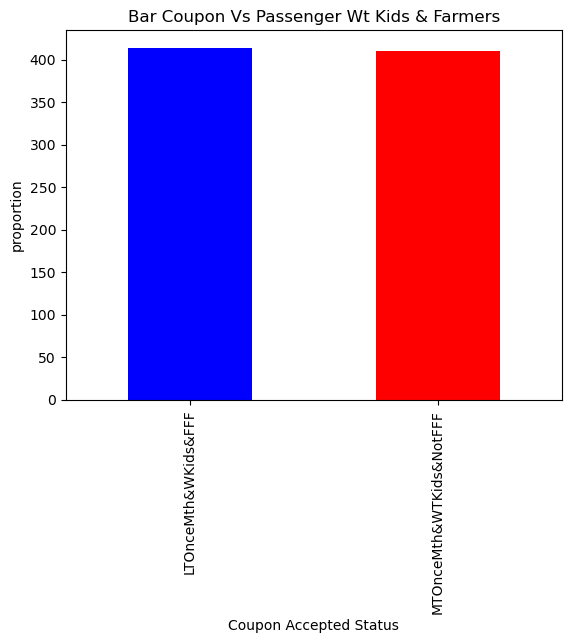

In [64]:
tmp = BarCouponData.query('CouponAcceptance == "Accepted"').groupby((BarCouponData['Bar'].str.contains('never|less1')== False)
                                                     &(BarCouponData['passanger'].str.contains('kids')==False)
                                                     &(BarCouponData['occupation'].str.contains('FarmingFishingAndForestry')==False))['CouponAcceptance'].value_counts()
tmp.plot.bar(color=['blue','red']) 
plt.xlabel('Coupon Accepted Status')
plt.xticks([0, 1], ['LTOnceMth&WKids&FFF', 'MTOnceMth&WTKids&NotFFF'])
plt.ylabel('proportion')
plt.title('Bar Coupon Vs Passenger Wt Kids & Farmers')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



<Axes: xlabel='None,CouponAcceptance'>

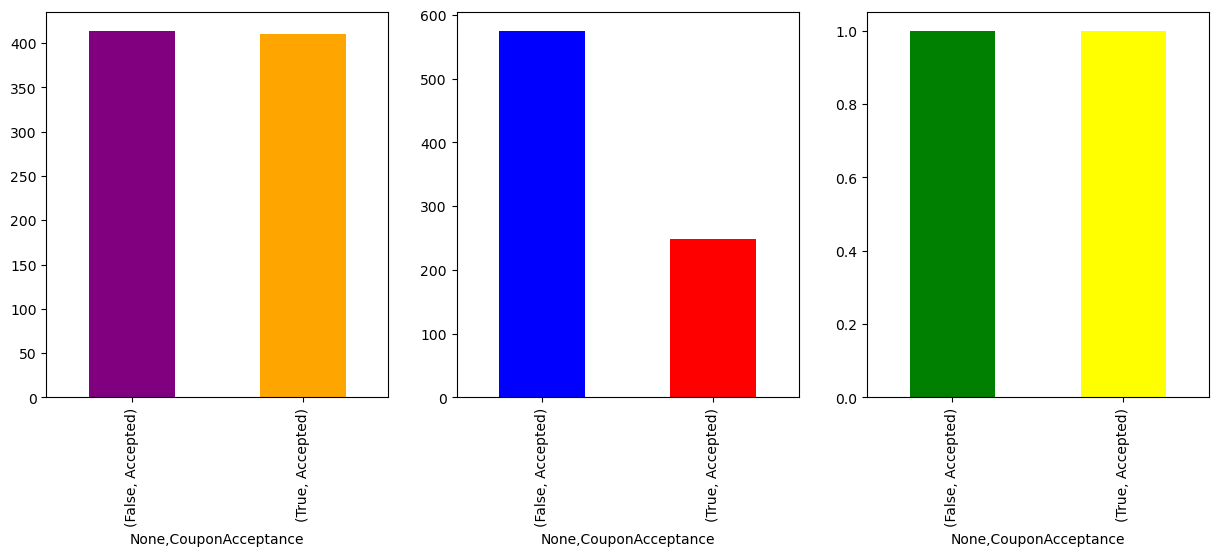

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
#go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
tmp1 = BarCouponData.query('CouponAcceptance == "Accepted"').groupby((BarCouponData['Bar'].str.contains('never|less1')== False)
                                                      &(BarCouponData['passanger'].str.contains('kids')==False)
                   &(BarCouponData['maritalStatus'].str.contains('Widowed')==False))['CouponAcceptance'].value_counts()

#go to bars more than once a month and are under the age of 30 *OR*
tmp2 = BarCouponData.query('CouponAcceptance == "Accepted"').groupby((BarCouponData['Bar'].str.contains('never|less1')== False)
                   &(BarCouponData['age'].str.contains('below21|21|26')))['CouponAcceptance'].value_counts()

#go to cheap restaurants more than 4 times a month and income is less than 50K.
tmp3 = BarCouponData.query('CouponAcceptance == "Accepted"').groupby((BarCouponData['RestaurantLessThan20'].str.contains('4-8|gt8'))
                   &(BarCouponData['income'].str.contains('LT$12500|$12500-$24999|$25000-$37499|$37500-$49999|')))['CouponAcceptance'].value_counts(normalize=True)

tmp1.plot.bar(ax=axes[0],color=['purple','orange'])

tmp2.plot.bar(ax=axes[1],color=['blue','red']) 

tmp3.plot.bar(ax=axes[2],color=['green','yellow']) 


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Conclusion:** Drivers who go to bar less and are younger are more likely to accept coupons. Their occupation or whether they have kids or not doesnt seem to make any difference to the acceptance rate and so is income. The major factor was age and their habit.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Visualization of Age as a factor with coupons and their acceptance rate

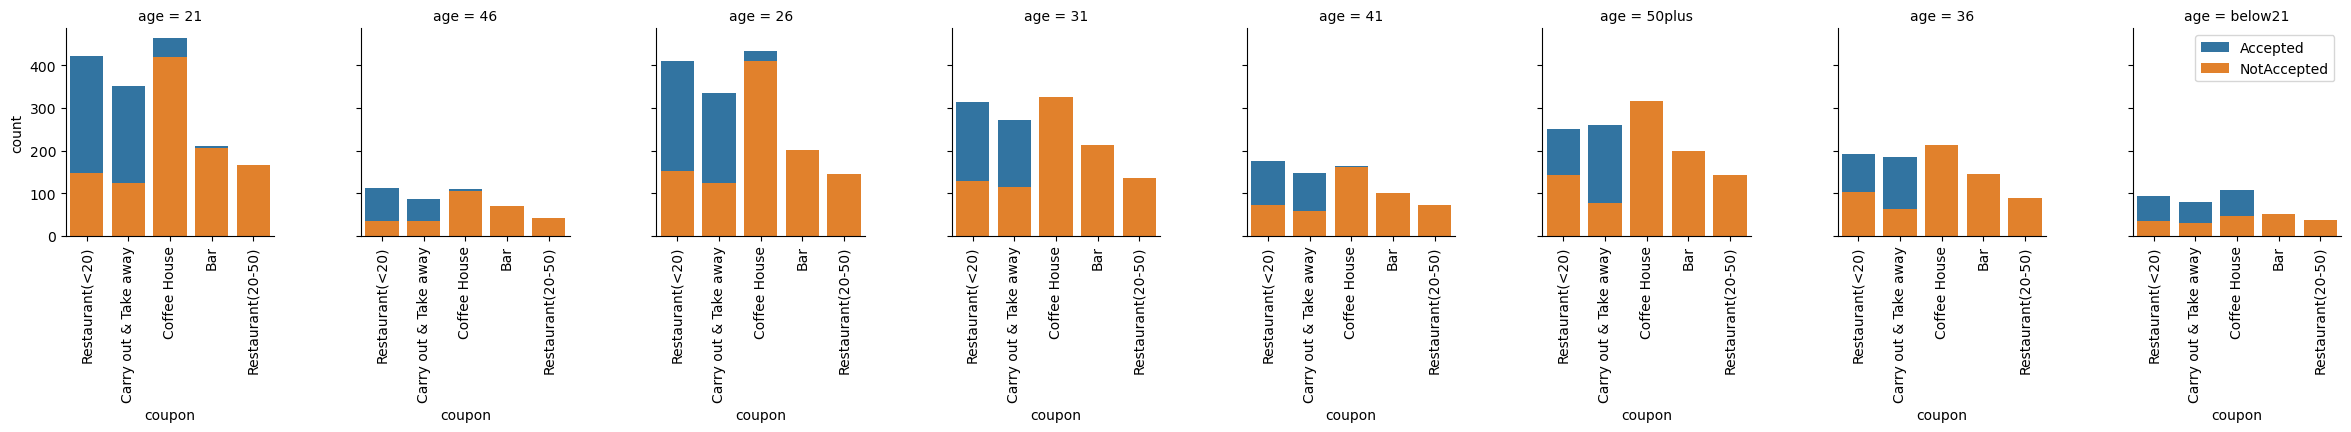

In [80]:
# Create a FacetGrid
g = sns.FacetGrid(data, col="age", hue='CouponAcceptance')

# Map the countplot to each facet
g.map(sns.countplot, "coupon")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend()
# Show the plot
plt.show()


Observation: There isn't a direct relationship between age feature alone and coupon acceptance rate as we can see at different age groups it varies but no particular trend.

Visualization of weather with coupons and their acceptance rate, Interesting to note that coupon acceptance is higher when the weather was sunny

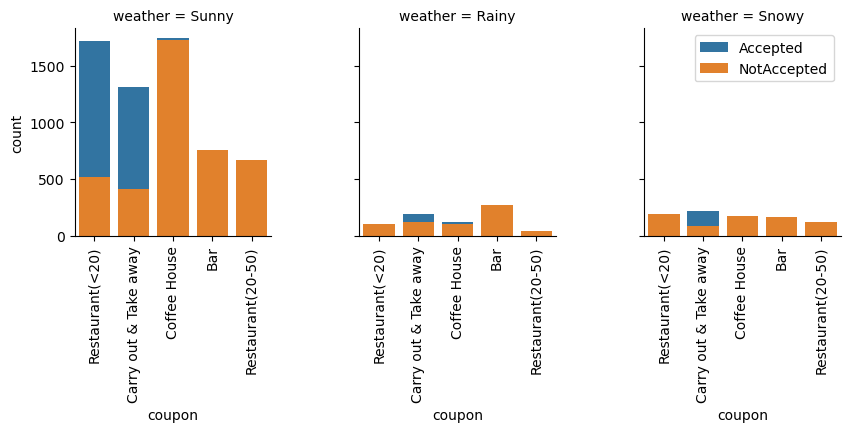

In [81]:
# Create a FacetGrid
g = sns.FacetGrid(data, col="weather", hue='CouponAcceptance')

# Map the countplot to each facet
g.map(sns.countplot, "coupon")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend()
# Show the plot
plt.show()

Visualization of Direction with coupons and their acceptance rate

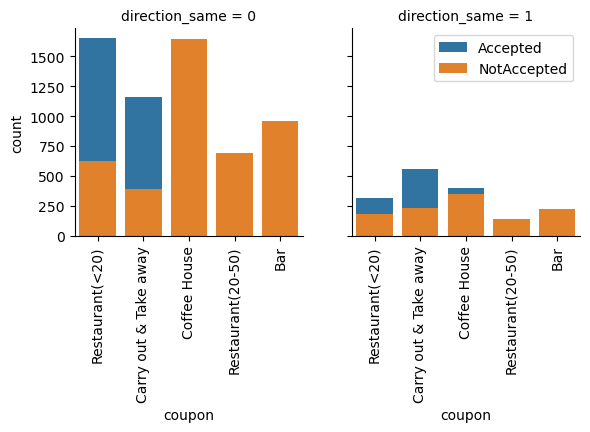

In [82]:
# Create a FacetGrid
g = sns.FacetGrid(data, col="direction_same", hue='CouponAcceptance')
# Map the countplot to each facet
g.map(sns.countplot, "coupon")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend()
# Show the plot
plt.show()

Observation: Coupon acceptance rate is better when drivers are moving in the same direction.

Visualization of Bar Visiting frequency with coupons and their acceptance rate

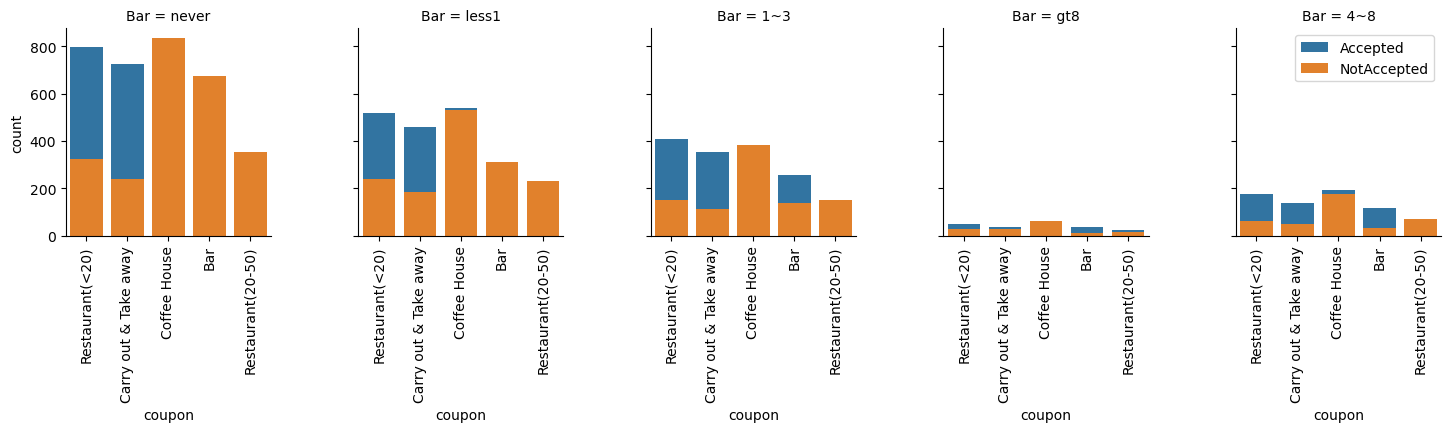

In [83]:
# Create a FacetGrid
g = sns.FacetGrid(data, col="Bar", hue='CouponAcceptance')

# Map the countplot to each facet
g.map(sns.countplot, "coupon")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend()
# Show the plot
plt.show()

Observation: Drivers who are more frequent Bar visitors tend to accept Bar coupons more.

Visualization of Validity of coupons with coupons and their acceptance rate

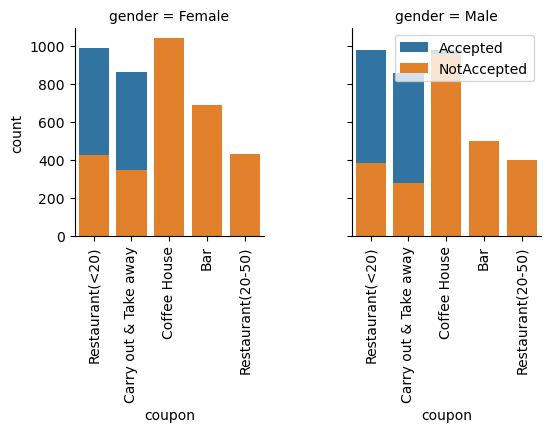

In [121]:
# Create a FacetGrid
g = sns.FacetGrid(data, col="gender", hue='CouponAcceptance')

# Map the countplot to each facet
g.map(sns.countplot, "coupon")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend()
# Show the plot
plt.show()

Observation: No particular trend based on gender.

Visualization of Desitnation with coupons and their acceptance rate

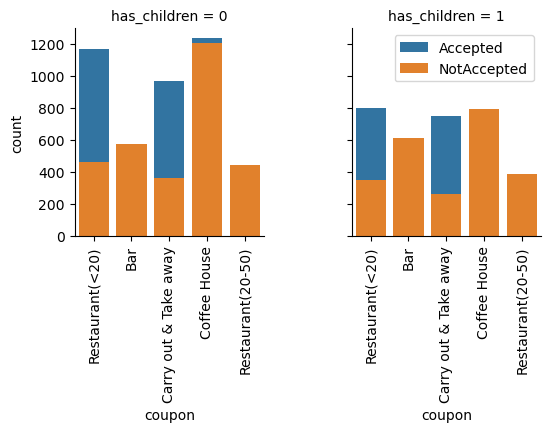

In [122]:
# Create a FacetGrid
g = sns.FacetGrid(data, col="has_children", hue='CouponAcceptance')
# Map the countplot to each facet
g.map(sns.countplot, "coupon")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend()
# Show the plot
plt.show()

Observation: No particular trend based whether drivers have children or not.

Visualization of MeritalStatus with coupons and their acceptance rate

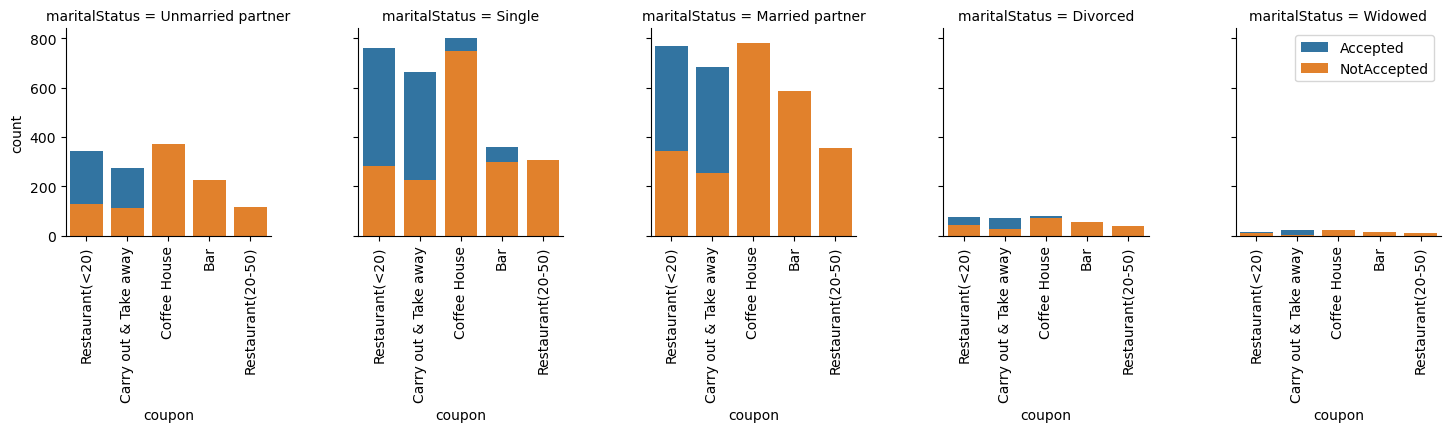

In [86]:
# Create a FacetGrid
g = sns.FacetGrid(data, col="maritalStatus", hue='CouponAcceptance')
# Map the countplot to each facet
g.map(sns.countplot, "coupon")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend()
# Show the plot
plt.show()

Above chart shows interesting relsstionship between the marital status and coupon acceptance, with very low rate among the windowed and divorced drivers.

**Overall Conclusion**

The Data analysis revealed that there’s a significant relationship between certain features and the target variable (Acceptance of Coupons). Specifically, time of the day like morning coffee, around lunch and dinner time restaurant and take out, sunny weather destination as no urgent place etc. Also people who go to bar more frequently were accepting noticeably more bar coupons. If the type of coupon presented was useful to them while they continue to move in the same direction as they were, it had a better chance of acceptance.Over all there was 59% drivers who accepted the coupon vs 41 who did not.